In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
from tensorflow.keras.models import load_model
model2 = load_model('.mdl_wts.hdf5')

model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 224, 224, 16)      448       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 224, 224, 16)      2320      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
separable_conv2d_12 (Separab (None, 112, 112, 32)      688       
_________________________________________________________________
separable_conv2d_13 (Separab (None, 112, 112, 32)      1344      
_________________________________________________________________
batch_normalization_6 (Batch (None, 112, 112, 32)      128 

In [ ]:
last_conv_layer_name = "separable_conv2d_20"
#last_conv_layer_name = "dropout_9"

classifier_layer_names = [
 #   "separable_conv2d_19",
 #   "batch_normalization_9",
 #   "max_pooling2d_15",
 #   "dropout_9",
 #   "separable_conv2d_20",
    "separable_conv2d_21",
    "batch_normalization_10",
    "max_pooling2d_16",
    "dropout_10",
    "separable_conv2d_22",
    "separable_conv2d_23",
    "batch_normalization_11",
    "max_pooling2d_17",
    "dropout_11",
    "flatten_1",
    "dense_5",
    "dropout_12",
    "dense_6",
    "dropout_13",
    "dense_7",
    "dropout_14",
    "dense_8",
    "dropout_15",
    "dense_9",
]


In [ ]:
import cv2
import numpy as np

# read image transform and resize
image = cv2.imread("16747_1_1.jpg")
#image = cv2.imread("val-covid.jpg")
#image = cv2.imread("000002-11-a.jpg")

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (224, 224))

# add to array (input format for keras model must be array - on position in our case)
inputData=[]
inputData.append(image)
#normalize values like they were used in train
data = np.array(inputData) / 255.0 #normalization

In [ ]:
#execute the model and show output
pred_Y = model2.predict(data, verbose = True)
pred_Y

1/1 [==============================] - 0s 1ms/step


array([[4.6181167e-12, 1.0000000e+00, 1.3137241e-10]], dtype=float32)

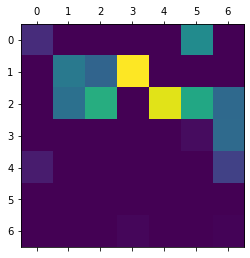

In [ ]:
# Generate class activation heatmap
heatmap = make_gradcam_heatmap(
    data, model2, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap)


plt.show()

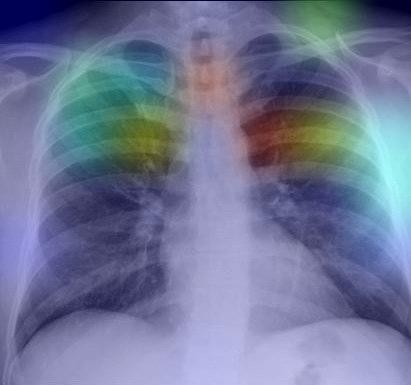

In [ ]:
#img = keras.preprocessing.image.load_img("16747_1_1.jpg")
#img = keras.preprocessing.image.load_img("val-covid.jpg")
img = keras.preprocessing.image.load_img("000002-11-a.jpg")

img = keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap = np.uint8(255 * heatmap)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap('jet')

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# Save the superimposed image
save_path = "elephant_cam.jpg"
superimposed_img.save(save_path)

# Display Grad CAM
display(Image(save_path))